In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [2]:
movie=pd.read_csv('my_movies.csv')
movie

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [3]:
movie.isna().sum()

V1               0
V2               0
V3               3
V4               8
V5               9
Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64

In [4]:
df = movie.iloc[:,5:]
df

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


In [5]:
df.dtypes

Sixth Sense      int64
Gladiator        int64
LOTR1            int64
Harry Potter1    int64
Patriot          int64
LOTR2            int64
Harry Potter2    int64
LOTR             int64
Braveheart       int64
Green Mile       int64
dtype: object

In [6]:
df.shape

(10, 10)

In [7]:
te=TransactionEncoder()

In [8]:
te_ary=te.fit(df).transform(df)

In [9]:
ap=pd.DataFrame(te_ary,columns=te.columns_)

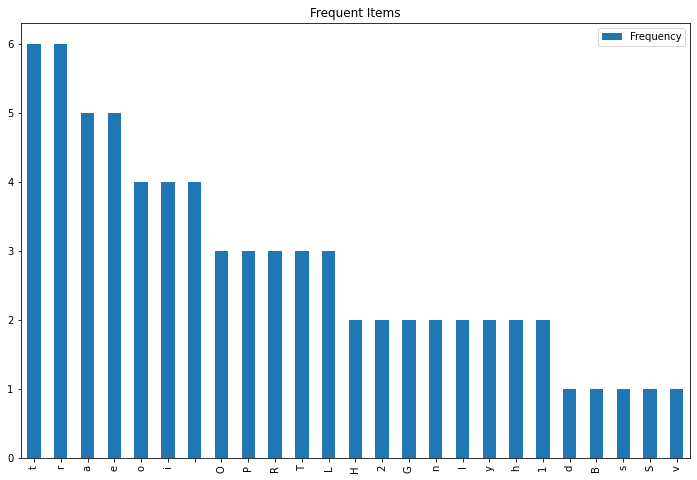

In [10]:
ap.sum().to_frame('Frequency').sort_values('Frequency',ascending=False)[:25].plot(kind='bar',
                                                                                  figsize=(12,8),
                                                                                  title="Frequent Items")
plt.show()

In [11]:
# Apriori algorithm
ap_0_5={}
ap_1={}
ap_5={}
ap_1_0={}
confidence=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

In [12]:
def gen_rules(df,confidence,support):
    ap = {}
    for i in confidence:
        ap_i =apriori(df,support,True)
        rule= association_rules(ap_i,min_threshold=i)
        ap[i] = len(rule.antecedents)
    return pd.Series(ap).to_frame("Support: %s"%support)


In [13]:
confs=[]

In [15]:
for i in [0.005,0.001,0.003,0.007]:
    ap_i=gen_rules(ap,confidence=confidence,support=i)
    confs.append(ap_i)
all_conf=pd.concat(confs,axis=1)


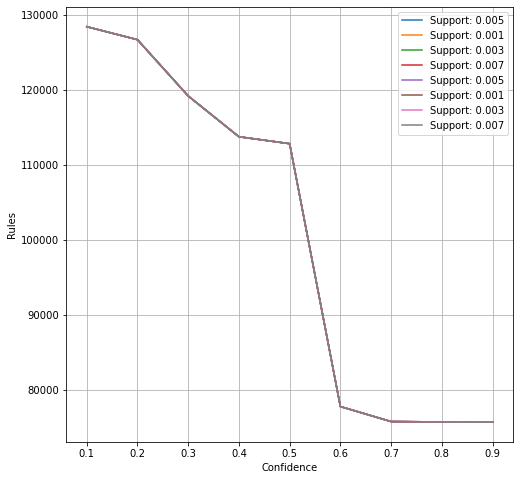

In [16]:
all_conf.plot(figsize=(8,8),grid=True)
plt.ylabel('Rules')
plt.xlabel('Confidence')
plt.show()


In [17]:
#Lower the Confidence level Higher the no. of rules.
#Higher the Support, lower the no. of rules.

In [19]:
ap_f=apriori(ap,0.005,True)

In [20]:
ap_f

,support,itemsets
0,0.4,( )
1,0.2,(1)
2,0.2,(2)
3,0.1,(B)
4,0.2,(G)
...,...,...
2664,0.1,"(t, x, S, e, s, h, i, , n)"
2665,0.1,"(t, H, o, a, e, r, y, 1, P)"
2666,0.1,"(t, 2, H, o, a, e, r, y, P)"
2667,0.1,"(t, H, o, a, e, r, y, 1, , P)"


In [21]:
rules_final = association_rules(ap_f,min_threshold=.4,support_only=False)
rules_final[rules_final['confidence'] > 0.5]


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3,(H),( ),0.2,0.4,0.2,1.000000,2.500000,0.12,inf
5,(M),( ),0.1,0.4,0.1,1.000000,2.500000,0.06,inf
7,(P),( ),0.3,0.4,0.2,0.666667,1.666667,0.08,1.8
8,(S),( ),0.1,0.4,0.1,1.000000,2.500000,0.06,inf
11,( ),(e),0.4,0.5,0.4,1.000000,2.000000,0.20,inf
...,...,...,...,...,...,...,...,...,...
113705,"(2, e)","(t, H, o, r, a, y, , P)",0.1,0.2,0.1,1.000000,5.000000,0.08,inf
113706,"(2, r)","(t, H, o, a, e, y, , P)",0.1,0.2,0.1,1.000000,5.000000,0.08,inf
113707,"(2, y)","(t, H, o, a, e, r, , P)",0.1,0.2,0.1,1.000000,5.000000,0.08,inf
113708,"(2, )","(t, H, o, a, e, r, y, P)",0.1,0.2,0.1,1.000000,5.000000,0.08,inf


In [22]:
support = rules_final["support"]
confidence =  rules_final["confidence"]
lift = rules_final["lift"]


Text(0.5, 0, 'lift')

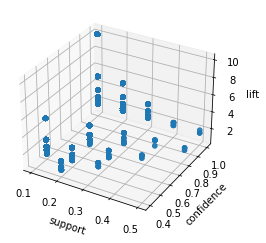

In [23]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection = '3d')
ax1.scatter(support,confidence,lift)
ax1.set_xlabel("support")
ax1.set_ylabel("confidence")
ax1.set_zlabel("lift")


Text(0, 0.5, 'confidence')

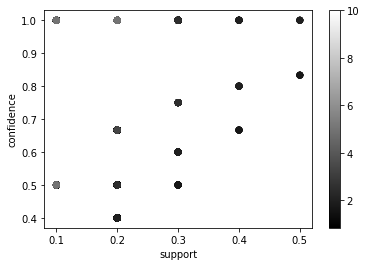

In [27]:
plt.scatter(support,confidence, c =lift, cmap = 'gray')
plt.colorbar()
plt.xlabel("support");plt.ylabel("confidence")
